In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

m = GEKKO()

# split time into 12 intervals
m.time = np.linspace(0, 1, 13)

In [3]:
# outflow rates
c0 = np.array([0.030, 0.015, 0.060, 0.0])
c = [m.Const(x) for x in c0]

# reservoir's areas
areas = np.array([13.4, 12.0, 384.5, 4400.])
a = [m.Const(x) for x in areas]

# water lost due to usage
usage_req = [0.03, 0.05, 0.02, 0.0]
Vuse = [m.Const(x) for x in usage_req]

# volumes of the reservoirs
v0 = np.array([0.26, 0.18, 0.68, 22.0])
V = [m.Var(x) for x in v0]

# depth of the reservoirs
h0 = 1000*v0/areas
h = [m.Var(x) for x in h0]

# the volume of water flowing out of the lakes
Vout0 = c0*np.sqrt(h0)
Vout = [m.Var(x) for x in Vout0]

# the volume of water flowing into the lakes
Vin = [0, 0, 0, 0]
Vin_0 = np.ones(13)*0.13
Vin_0[3:6] = 0.21
Vin[0] = m.Param(Vin_0.tolist())
Vin[1:4] = Vout[1:4]

# water lost due to the evaporation
evap = [m.Param(x) for x in [1e-5, 1e-5, 1e-5, 0.5e-5]]
Vevap = [m.Intermediate(evap[i]*areas[i]) for i in range(4)]



In [4]:
# dynamic equations
m.Equations([V[i].dt() == Vin[i] - Vout[i] - Vuse[i] - Vevap[i] for i in range(4)])
m.Equations([h[i] == 1000.0*(V[i]/a[i]) for i in range(4)])
m.Equations([Vout[i] == c[i] * h[i]**0.5 for i in range(4)])

In [5]:
m.options.imode = 6
m.solve()

apm 176.61.86.133_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.6
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :           12
   Variables    :           17
   Intermediates:            4
   Connections  :            0
   Equations    :           16
   Residuals    :           12
 
 Number of state variables:            192
 Number of total equations: -          192
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

In [6]:
lakes = [name.strip() for name in "Jordanelle reservoir, Deer Creek reservoir, Utah Lake, Great Salt Lake".split(",")]

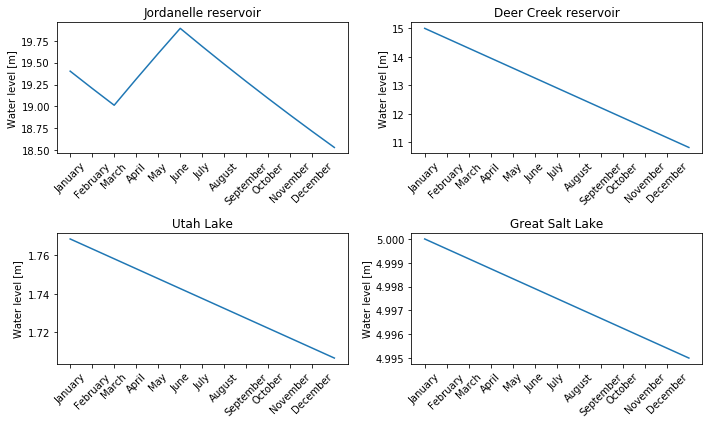

In [7]:
# plot
lakes = [name.strip() for name in "Jordanelle reservoir, Deer Creek reservoir, Utah Lake, Great Salt Lake".split(",")]

fig = plt.figure(figsize=(10, 6))
for lake_id in range(4):
    ax = fig.add_subplot(2, 2, lake_id+1)
    plt.plot(np.arange(13)+1, h[lake_id])
    ax.set_xticks(np.arange(1, 13))
    ax.set_xticklabels(["January", "February", "March",
                "April", "May", "June", "July",
                "August", "September", "October",
                "November", "December"], rotation=45)
    ax.set_ylabel("Water level [m]")
    ax.set_title(lakes[lake_id])
    
plt.tight_layout()
plt.savefig("/Users/aspiela/Desktop/lakes.png")

apm 176.61.86.133_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.6
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            4
   Variables    :           21
   Intermediates:            7
   Connections  :            0
   Equations    :           19
   Residuals    :           12
 
 Number of state variables:            192
 Number of total equations: -          192
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains I

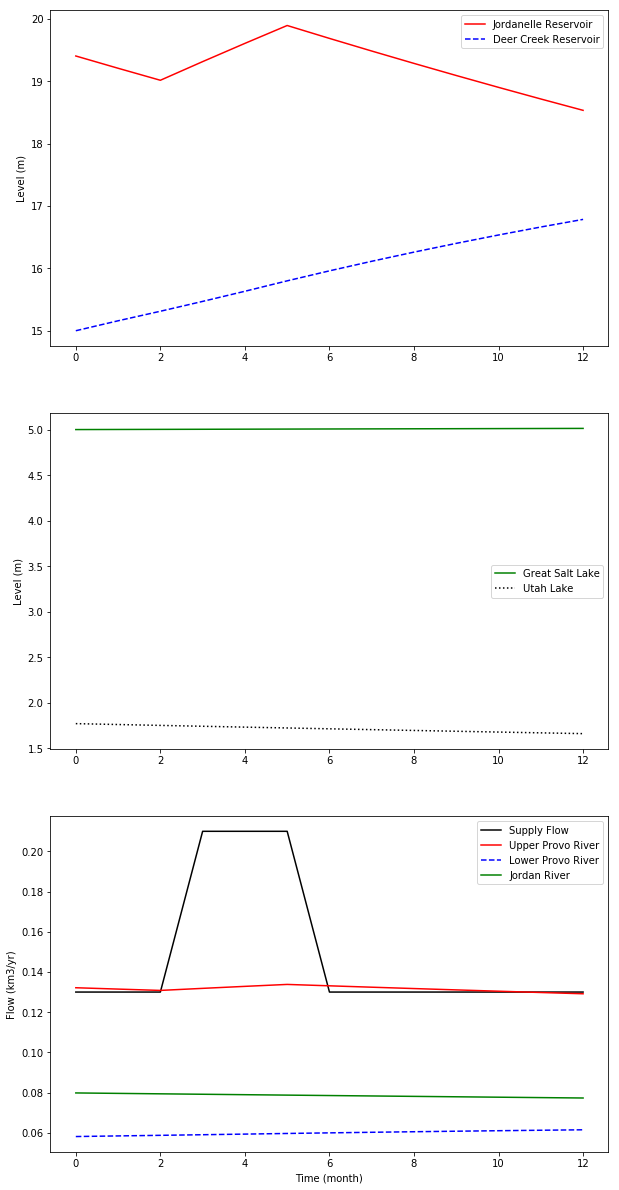

In [8]:
from __future__ import division
from gekko import GEKKO
import numpy as np

#Initial conditions
c = np.array([0.03,0.015,0.06,0])
areas = np.array([13.4, 12, 384.5, 4400])
V0 = np.array([0.26, 0.18, 0.68, 22])
h0 = 1000 * V0 / areas
Vout0 = c * np.sqrt(h0)
vin = [0.13,0.13,0.13,0.21,0.21,0.21,0.13,\
       0.13,0.13,0.13,0.13,0.13,0.13]
Vin = [0,0,0,0]

#Initialize model
m = GEKKO()

#time array 
m.time = np.linspace(0,1,13)
#define constants
c = m.Array(m.Const,4,value=0)
c[0].value = 0.03
c[1].value = c[0] / 2
c[2].value = c[0] * 2
c[3].value = 0
Vuse = [0.03,0.05,0.02,0.00]

#Parameters
evap_c = m.Array(m.Param,4,value=1e-5)
evap_c[-1].value = 0.5e-5

A = [m.Param(value=i) for i in areas]

Vin[0] = m.Param(value=vin)

#Variables
V = [m.Var(value=i) for i in V0]
h = [m.Var(value=i) for i in h0]
Vout = [m.Var(value=i) for i in Vout0]

#Intermediates
Vin[1:4] = [m.Intermediate(Vout[i]) for i in range(3)]
Vevap = [m.Intermediate(evap_c[i] * A[i]) for i in range(4)]

#Equations
m.Equations([V[i].dt() == \
             Vin[i] - Vout[i] - Vevap[i] - Vuse[i] \
             for i in range(4)])
m.Equations([1000*V[i] == h[i]*A[i] for i in range(4)])
m.Equations([Vout[i]**2 == c[i]**2 * h[i] for i in range(4)])


#Set to simulation mode
m.options.imode = 4

#Solve
m.solve()

#%% Plot results
time = [x * 12 for x in m.time] 

# plot results
#import matplotlib.pyplot as plt
#plt.figure(1)
fig = plt.figure(figsize=(10, 21))

plt.subplot(311)
plt.plot(time,h[0].value,'r-')
plt.plot(time,h[1].value,'b--')
plt.ylabel('Level (m)')
plt.legend(['Jordanelle Reservoir','Deer Creek Reservoir'])

plt.subplot(312)
plt.plot(time,h[3].value,'g-')
plt.plot(time,h[2].value,'k:')
plt.ylabel('Level (m)')
plt.legend(['Great Salt Lake','Utah Lake'])

plt.subplot(313)
plt.plot(time,Vin[0].value,'k-')
plt.plot(time,Vout[0].value,'r-')
plt.plot(time,Vout[1].value,'b--')
plt.plot(time,Vout[2].value,'g-')
plt.xlabel('Time (month)')
plt.ylabel('Flow (km3/yr)')
plt.legend(['Supply Flow','Upper Provo River', \
            'Lower Provo River','Jordan River'])
plt.show()

In [9]:
h

[[19.40299, 19.20641, 19.01394, 19.31262, 19.60511, 19.89159, 19.6849, 19.48247, 19.28424, 19.09014, 18.90011, 18.71408, 18.53199],
 [15.0, 15.15939, 15.31216, 15.46995, 15.63249, 15.79955, 15.95968, 16.11305, 16.25983, 16.40018, 16.53427, 16.66226, 16.7843],
 [1.768531, 1.758775, 1.74913, 1.739597, 1.730178, 1.720873, 1.71168, 1.702594, 1.693612, 1.684731, 1.675947, 1.667259, 1.658662],
 [5.0, 5.001088, 5.002172, 5.003252, 5.004328, 5.0054, 5.006468, 5.007532, 5.008592, 5.009649, 5.010701, 5.011751, 5.012796]]